# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]  #for make inline plot bigger
import warnings
warnings.filterwarnings('ignore')


In [3]:
# read csv file
df = pd.read_csv("telco_churn.csv")

In [4]:
df.sample(n=10)

# 7043X21 DataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
853,7905-TVXTA,Female,0,No,No,5,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,64.35,352.65,No
3683,7688-AWMDX,Male,0,Yes,No,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),54.50,3778.2,No
3349,0897-FEGMU,Female,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.50,1056.95,Yes
2663,5140-FOMCQ,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.15,6557.75,No
6006,1360-RCYRT,Male,0,Yes,Yes,23,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),30.35,678.75,No
6175,4377-VDHYI,Male,0,Yes,Yes,32,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,One year,Yes,Electronic check,90.80,3023.85,No
5711,1891-UAWWU,Female,1,Yes,No,20,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,90.80,1951,Yes
2861,2004-OCQXK,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,81.95,81.95,Yes
5344,6283-GITPX,Male,0,No,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),76.90,5522.7,No
4396,0023-HGHWL,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1,Yes


In [5]:
df.columns
# tenure : Number of months the customer has stayed with the company

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
def find_standard_error(mean,std):
    return std / (mean**(1/2))

# std error will show us how values deviate from mean
print("\nTenure standard error: " + str(find_standard_error(df["tenure"].mean(),df["tenure"].std())))

print("\nMontly Caherges standard error: " + str(find_standard_error(df["MonthlyCharges"].mean(),df["MonthlyCharges"].std())))



Tenure standard error: 4.316583339861322

Montly Caherges standard error: 3.7390715220072055


# Data Manipulation

In [7]:
df.isna().sum() # there are not NA values in the data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# there are some empty values in total charges, lets fix it

for index,value in enumerate(df["TotalCharges"]):
    if(value==" "):
        df.drop(index,axis=0,inplace=True) # drop empty records

df["TotalCharges"] = df["TotalCharges"].astype("float32") # convert from string to float

In [9]:
# replace 'No internet service' to No for the following columns

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [10]:
#replace SeniorCitizen value
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

# Exploratory Data Visualization

Text(0.5, 1.0, 'Percentage of Churned or Not')

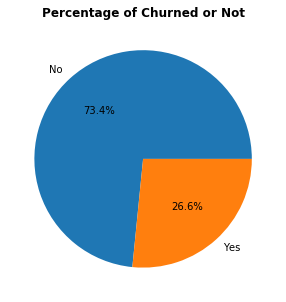

In [11]:
# how many percenge of customers churned or not 
fig,ax  = plt.subplots()
plt.pie(df["Churn"].value_counts(),labels=["No","Yes"],autopct='%1.1f%%')
plt.title("Percentage of Churned or Not",fontdict={"weight":"bold"})


In [12]:
#Comment: Classes are unevenly distributed

Text(0, 0.5, 'Churn')

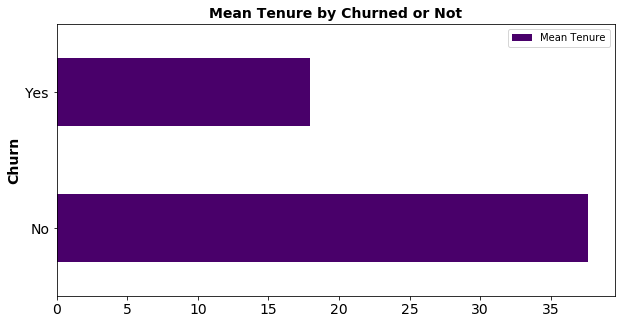

In [13]:
# mean tenure of churned or not churned customers

churned_tenure = df.groupby("Churn").mean()["tenure"]
churned_tenure.name = "Mean Tenure"

ax = churned_tenure.plot(kind="barh",legend=True,colormap="RdPu_r",fontsize=14)
plt.title("Mean Tenure by Churned or Not",fontdict={"fontsize": 14,"weight":"bold"})
plt.ylabel("Churn",fontdict={"fontsize": 14,"weight":"bold"})

In [14]:
#Comment: customers who have churned have been member of the company for a shorter period of time

Text(0, 0.5, 'Churn')

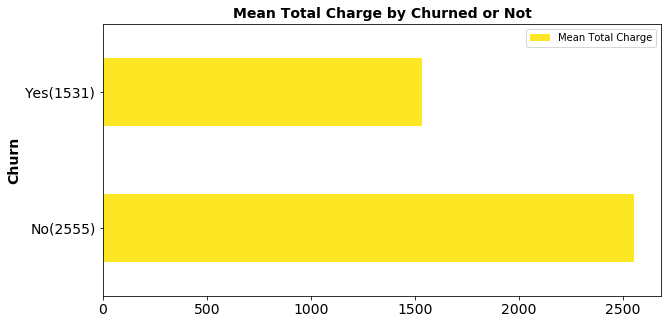

In [15]:
# mean total charges of churned or not churned customers
churned_total_charge = df.groupby("Churn").mean()["TotalCharges"]
churned_total_charge.name = "Mean Total Charge"

churned_total_charge.index = ["No({0})".format(int(churned_total_charge["No"])),"Yes({0})".format(int(churned_total_charge["Yes"]))]

ax = churned_total_charge.plot(kind="barh",legend=True,colormap="viridis_r",fontsize=14)

plt.title("Mean Total Charge by Churned or Not",fontdict={"fontsize": 14,"weight":"bold"})
plt.ylabel("Churn",fontdict={"fontsize": 14,"weight":"bold"})

In [16]:
# Comment: Churned Customers have less total charge than not churned customers.
#(one of the reaseon is that churned customers have less life time in company compare to not churned customers)

Text(0.5, 1.0, 'Not Churned')

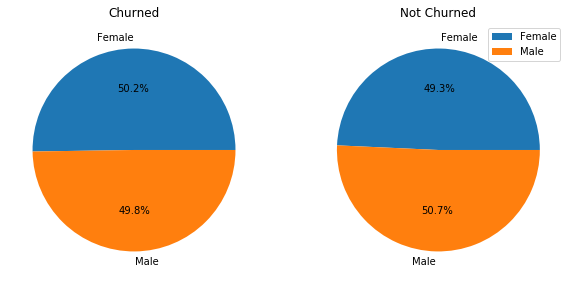

In [17]:
# gender distribution in customer attrition

fig ,ax = plt.subplots(1,2)
churned_gender = df[df["Churn"]=="Yes"].groupby("gender").count()["Churn"]

not_churned_gender = df[df["Churn"]=="No"].groupby("gender").count()["Churn"]

ax[0].pie(churned_gender,labels=["Female","Male"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_gender,labels=["Female","Male"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [18]:
# Comment: can see relationship between gender and Churned or not

Text(0.5, 1.0, 'Not Churned')

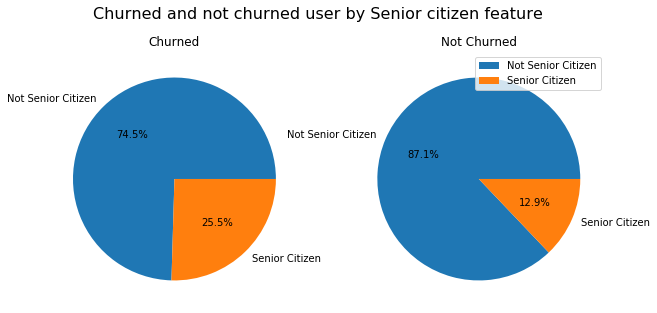

In [19]:
# senior distribution in customer attrition
fig ,ax = plt.subplots(1,2)
fig.suptitle('Churned and not churned user by Senior citizen feature', fontsize=16)
churned_senior = df[df["Churn"]=="Yes"].groupby("SeniorCitizen").count()["Churn"]

not_churned_senior = df[df["Churn"]=="No"].groupby("SeniorCitizen").count()["Churn"]

ax[0].pie(churned_senior,labels=["Not Senior Citizen","Senior Citizen"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_senior,labels=["Not Senior Citizen","Senior Citizen"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [20]:
# Comment : Not senior citizen in majority. Churned class have more Senior Citizen than Not Churned class.

Text(0.5, 1.0, 'Not Churned')

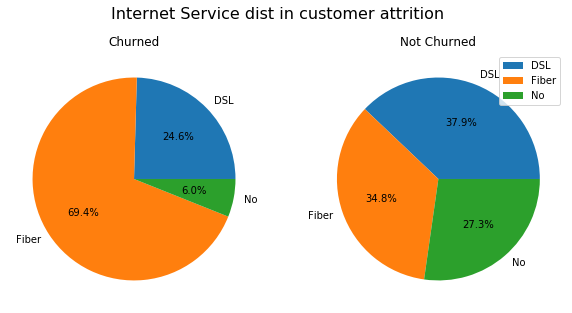

In [21]:
# Internet Service dist in customer attrition
fig ,ax = plt.subplots(1,2)
fig.suptitle('Internet Service dist in customer attrition', fontsize=16)
churned_internet = df[df["Churn"]=="Yes"].groupby("InternetService").count()["Churn"]

not_churned_internet = df[df["Churn"]=="No"].groupby("InternetService").count()["Churn"]

ax[0].pie(churned_internet,labels=["DSL","Fiber","No"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_internet,labels=["DSL","Fiber","No"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [22]:
#Comment : Most of Churned customer use  fiber optics as Internet Service. 
#Internet Service attribute can be used as a discriminator.

Text(0.5, 1.0, 'Not Churned')

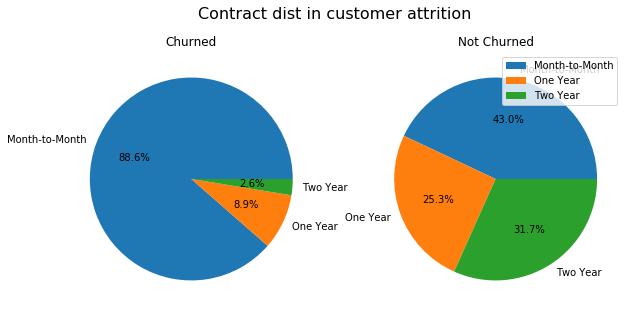

In [23]:
# contract distribution in customer attrition
fig ,ax = plt.subplots(1,2)
fig.suptitle('Contract dist in customer attrition', fontsize=16)
churned_contract = df[df["Churn"]=="Yes"].groupby("Contract").count()["Churn"]

not_churned_contract = df[df["Churn"]=="No"].groupby("Contract").count()["Churn"]

ax[0].pie(churned_contract,labels=["Month-to-Month","One Year","Two Year"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_contract,labels=["Month-to-Month","One Year","Two Year"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [24]:
#Comment: Most of churned customer's Contract type is  Month-to-month. We can use this attribute

Text(0.5, 1.0, 'Not Churned')

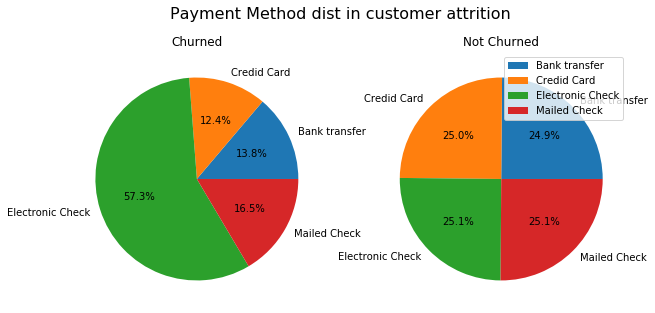

In [25]:
# payment method distribution in customer attrition
fig ,ax = plt.subplots(1,2)
fig.suptitle('Payment Method dist in customer attrition', fontsize=16)
churned_payment = df[df["Churn"]=="Yes"].groupby("PaymentMethod").count()["Churn"]

not_churned_payment = df[df["Churn"]=="No"].groupby("PaymentMethod").count()["Churn"]

ax[0].pie(churned_payment,labels=["Bank transfer","Credid Card","Electronic Check","Mailed Check"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_payment,labels=["Bank transfer","Credid Card","Electronic Check","Mailed Check"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [26]:
# Comment: Interesting Statistic, more than %50 of customers who had churned use eleckronic Check to make payment.
# This may be due to easier cancellation of electronic checks

In [27]:
# lets create tenure_interval for better understanding
def set_tenure_interval(x):
    if x <= 12 :
        return "0-12"
    elif (x > 12 and x <= 24 ):
        return "12-24"
    elif (x > 24 and x <= 48) :
        return "24-48"
    elif (x > 48 and x <= 60) :
        return "48-60"
    elif x > 60 :
        return "60+"

df["tenure_interval"] = df["tenure"].apply(lambda x:set_tenure_interval(x))

Text(0.5, 1.0, 'Not Churned')

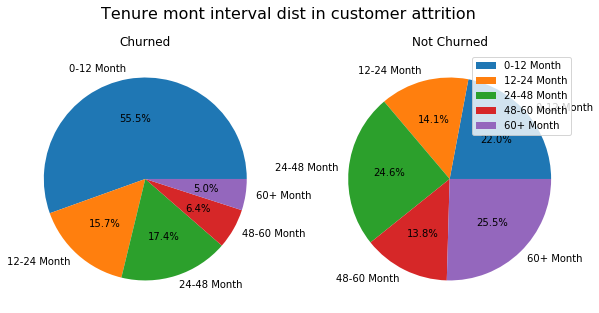

In [28]:
# tenure month interval distribution in customer attrition
fig ,ax = plt.subplots(1,2)
fig.suptitle('Tenure mont interval dist in customer attrition', fontsize=16)

churned_tenure_interval = df[df["Churn"]=="Yes"].groupby("tenure_interval").count()["Churn"]
not_churned_tenure_interval = df[df["Churn"]=="No"].groupby("tenure_interval").count()["Churn"]

ax[0].pie(churned_tenure_interval,labels=["0-12 Month","12-24 Month","24-48 Month","48-60 Month","60+ Month"],autopct='%1.1f%%')
ax[0].set_title("Churned")
ax[1].pie(not_churned_tenure_interval,labels=["0-12 Month","12-24 Month","24-48 Month","48-60 Month","60+ Month"],autopct='%1.1f%%')
ax[1].legend()

ax[1].set_title("Not Churned")

In [29]:
# Comment: More than %50 of customers have churned in 0-12 month.


Text(0, 0.5, 'Count')

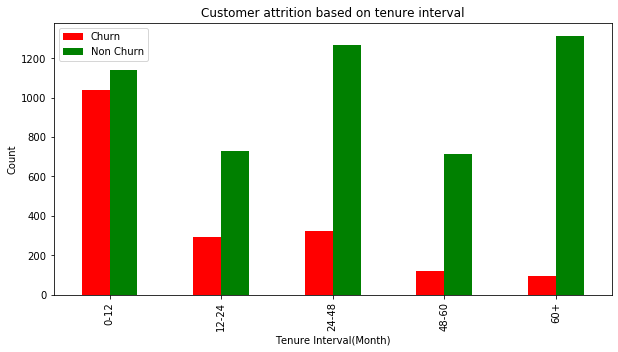

In [30]:
# customer attrition based on tenure interval

churn_interval = df[df["Churn"]=="Yes"].groupby("tenure_interval").count()["Churn"]
not_churn_interval = df[df["Churn"]=="No"].groupby("tenure_interval").count()["Churn"]
not_churn_interval.name = "Non Churn"

churn_by_interval = pd.concat([churn_interval,not_churn_interval],axis=1)

ax = churn_by_interval.plot(kind="bar",color=["red","green"])

ax.set_title("Customer attrition based on tenure interval")
ax.set_xlabel("Tenure Interval(Month)")
ax.set_ylabel("Count")

In [31]:
# Comment: This tenure_interval info will give us better information than tenure feature. 
# We'll use tenure_interval rather than tenure

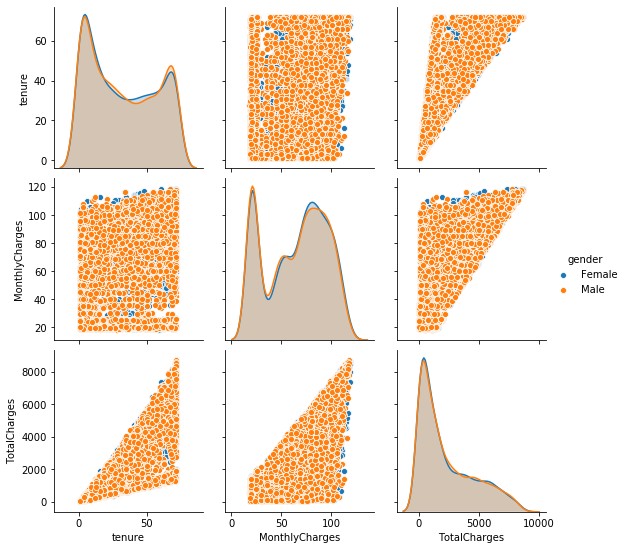

In [32]:
# lets see gender and other numeric features relationship
ax = sns.pairplot(df[["tenure","MonthlyCharges","TotalCharges","gender"]],hue="gender")

In [33]:
#Comment: Features like MonthlyCharges,TotalCharges and tenure do not effect from gender too much.

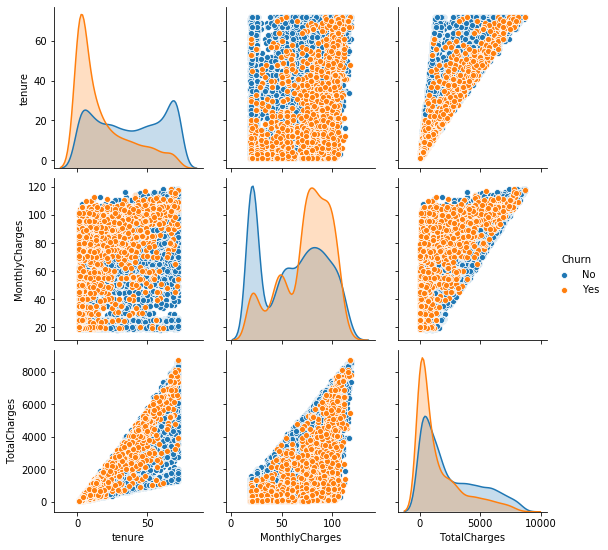

In [34]:
# lets plot pairplot for see relationships between numeric variables
ax = sns.pairplot(df[["tenure","MonthlyCharges","TotalCharges","Churn"]],hue="Churn")

In [35]:
# Comment: there are almost liner relationship between TotalCharges-tenure and MonthlyCharges-TotalCharges

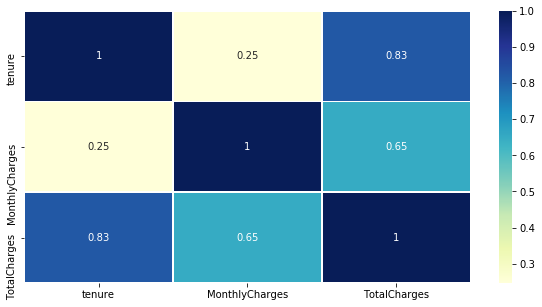

In [36]:
# let look at the corralation matrix for numeric variables

ax = sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap="YlGnBu")

In [37]:
# as we said, we can see relationship between TotalCharges-tenure(0.83) and MonthlyCharges-TotalCharges(0.83)

# Data Preprocessing

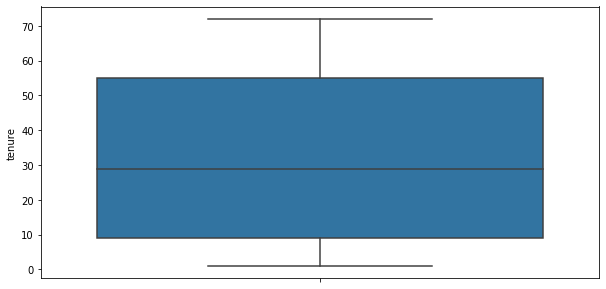

In [38]:
# OUTLIER Analysis for numeric variables
# BOXPLOT

# tenure boxplot
sns.boxplot(df["tenure"],orient="v")

In [39]:
# Comment: looks good, no outliers, low skewness

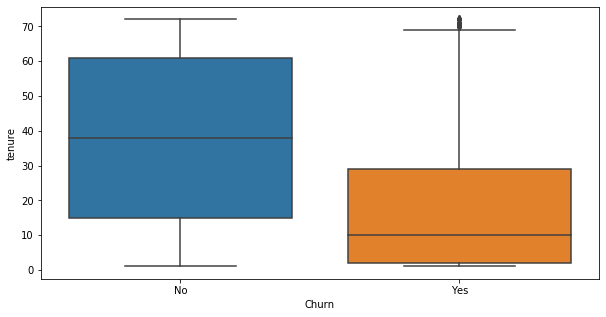

In [40]:
# churn and tenure

sns.boxplot(x="Churn",y="tenure",data=df)

In [41]:
# Comment: there may be outliers variable in Churn-Yes class. We will analyze it

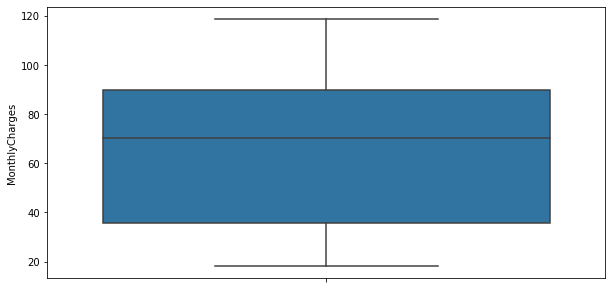

In [42]:
# MontlyCharges boxplot
sns.boxplot(df["MonthlyCharges"],orient="v")

In [43]:
# Comment: Looks good

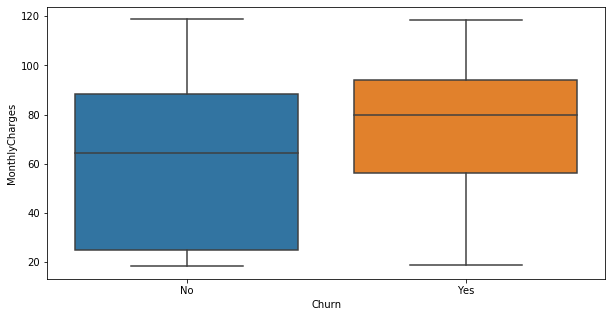

In [44]:
# churn and MontlyCharges

sns.boxplot(x="Churn",y="MonthlyCharges",data=df)

In [45]:
# Comment: Both class have a litle bit skewness but no problem.

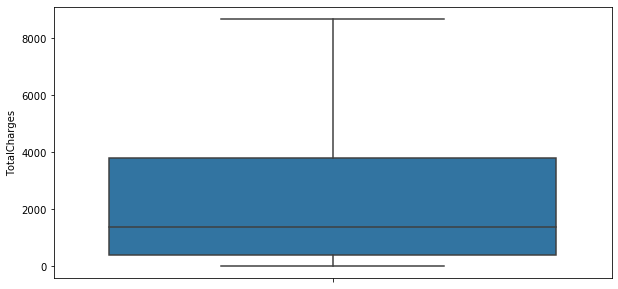

In [46]:
# TotalCharges boxplot
sns.boxplot(df["TotalCharges"],orient="v")

In [47]:
# Comment: Looks good

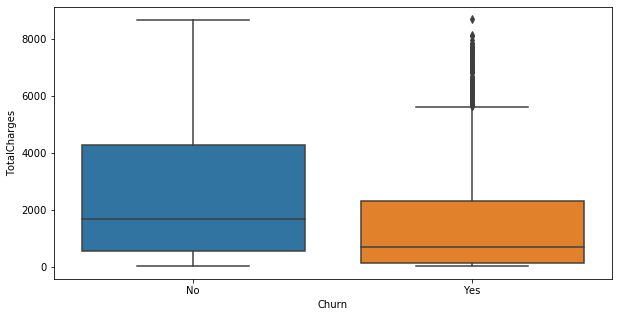

In [48]:
# Churn and TotalCharges

sns.boxplot(x="Churn",y="TotalCharges",data=df)

In [49]:
# Comment: there may be outliers variable in Churn-Yes class. We will analyze it

In [50]:
# LETS USE IQR RANGE METHOD ON TOTALCHARGES AND TENURE TO DETECT OUTLİERS


def find_outliers(series):  # find otuliers by using IQR range and return it
    q75 , q25 = np.percentile(series,[75,25])
    IQR = q75-q25
    lower_bound = q25-IQR*1.5
    upper_bound = q75 + IQR*1.5    
    
    outliers = {}
    for index,val in enumerate(series):
        if(val<lower_bound or val>upper_bound):
            outliers[index] = val
    
    outliers = pd.DataFrame(data= outliers.items(),columns=["Index",series.name])

    if(outliers.size==0):
        print("Can't find outlier value in that column")
    else:
        print("\nLower Bound:{0}\n-\n-\n-\n-\n-\nUpper Bound: {1}".format(lower_bound,upper_bound))
        return outliers
    
def delete_outliers(outliers_df): # delete specified outliers form raw dataframe
    for idx in outliers_df["Index"]:
        df.drop(idx,inplace=True)
        print(str(idx)+ " deleted")

In [51]:
# CHURN-TENURE IQR RANGE ANALYSİS
print("Bounds for tenure feature:")
tenure_churn_outliers = find_outliers(df[df["Churn"]=="Yes"]["tenure"])

Bounds for tenure feature:

Lower Bound:-38.5
-
-
-
-
-
Upper Bound: 69.5


In [52]:
tenure_churn_outliers.head()

,Index,tenure
0,202,70
1,248,71
2,339,70
3,751,70
4,793,71


In [53]:
# churn(yes)- monthlycharges outlier analysis
find_outliers(df[df["Churn"]=="Yes"]["MonthlyCharges"])

Can't find outlier value in that column


In [54]:
# churn(no)- monthlycharges outlier analysis
find_outliers(df[df["Churn"]=="No"]["MonthlyCharges"])

Can't find outlier value in that column


In [55]:
# Comment: Cant find outliers on MonthlyCharges column.

In [56]:
# there are some outliers values on TotaCharges also


In [57]:
totalcharges_churn_outliers = find_outliers(df[df["Churn"]=="Yes"]["TotalCharges"])
totalcharges_churn_outliers.head()


Lower Bound:-3160.7000732421875
-
-
-
-
-
Upper Bound: 5626.5001220703125


,Index,TotalCharges
0,24,7611.850098
1,88,6603.000000
2,102,7007.600098
3,110,6396.450195
4,148,6786.399902


In [58]:
# let's delete a entitiy if the entity cause outlier value on both Total Charges and tenure columns
outliers = totalcharges_churn_outliers.merge(tenure_churn_outliers,on = "Index" )
outliers.head()

,Index,TotalCharges,tenure
0,202,7250.149902,70
1,248,7532.149902,71
2,339,8127.600098,70
3,751,7101.500000,70
4,793,7690.899902,71


In [59]:
delete_outliers(outliers) # Outlier Values are deleted.

202 deleted
248 deleted
339 deleted
751 deleted
793 deleted
815 deleted
901 deleted
916 deleted
1026 deleted
1182 deleted
1206 deleted
1467 deleted
1507 deleted
1509 deleted
1596 deleted
1662 deleted
1691 deleted
1729 deleted
1840 deleted


In [60]:
# ENCODE CATEGORIC VARIABLES

from sklearn.preprocessing import LabelEncoder

# apply label encoder to the binary variable
binary_variables = []
for col in df:
    if(len(df[col].value_counts()) == 2 and df[col].dtype=="O" and col !="customerID"):
        binary_variables.append(col)


In [61]:
# lets fit label encoder to the binary attributes
        
LE = LabelEncoder()
for col_name in binary_variables:
    df[col_name] = LE.fit_transform(df[col_name])
    print(col_name+ " is encoded")

gender is encoded
SeniorCitizen is encoded
Partner is encoded
Dependents is encoded
PhoneService is encoded
OnlineSecurity is encoded
OnlineBackup is encoded
DeviceProtection is encoded
TechSupport is encoded
StreamingTV is encoded
StreamingMovies is encoded
PaperlessBilling is encoded
Churn is encoded


In [62]:
# lets take categoric columns (not binary)

categoric_variables = []

for col in df:
    if(len(df[col].value_counts()) > 2 and df[col].dtype=="O" and col !="customerID"):
        categoric_variables.append(col)
print("Categoric Variable:")
print(categoric_variables)

Categoric Variable:
['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_interval']


In [63]:
# lets apply pd.getdummies to the categoric_variables 

df = pd.get_dummies(df,prefix = categoric_variables,columns = categoric_variables)

In [64]:
df.head() # know our df look like this

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_interval_0-12,tenure_interval_12-24,tenure_interval_24-48,tenure_interval_48-60,tenure_interval_60+
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [65]:
# train test split
# before train_test_split, we will use tenure_interval for classification, lets delete tenure feature

df.drop("tenure",axis=1,inplace=True)

In [66]:
# customer_id ->index
df.set_index("customerID",inplace=True)

In [67]:
# create dependent and independet variable

X = df.drop(["Churn"],axis=1)
y = df[["Churn"]]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42,stratify=y)

In [69]:
# Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
# Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.
# let's try z-score

In [70]:
# Normalize MontlyCharges and TotalCharges values based on train set mean and std to prevent information linkage

In [71]:
MonthlyCharge_train_mean = np.mean(X_train["MonthlyCharges"])
MonthlyCharge_train_std = np.std(X_train["MonthlyCharges"])

TotalCharge_train_mean = np.mean(X_train["TotalCharges"])
TotalCharge_train_std = np.std(X_train["TotalCharges"])
# MC : Monthly Charge
# TC : Total Charge
print("MC Mean: {0}, MC std: {1}".format(MonthlyCharge_train_mean,MonthlyCharge_train_std))
print("TC Mean: {0}, TC std: {1}".format(TotalCharge_train_mean,TotalCharge_train_std))

MC Mean: 64.70062749572162, MC std: 30.054471947964355
TC Mean: 2272.622314453125, TC std: 2265.278076171875


In [72]:
# Z-score  normalization
X_train["MonthlyCharges"] = X_train["MonthlyCharges"].apply(lambda x: (x-MonthlyCharge_train_mean)/MonthlyCharge_train_std)

X_test["MonthlyCharges"] = X_test["MonthlyCharges"].apply(lambda x: (x-MonthlyCharge_train_mean)/MonthlyCharge_train_std)


X_train["TotalCharges"] = X_train["TotalCharges"].apply(lambda x: (x-TotalCharge_train_mean)/TotalCharge_train_std)

X_test["TotalCharges"] = X_test["TotalCharges"].apply(lambda x: (x-TotalCharge_train_mean)/TotalCharge_train_std)


# Building Classification Models

In [74]:
# import some libraries for classification
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ROCAUC

In [75]:
# FUNCIONS TO EVALUATE MODELS

def evaluate_model(model,x_test,y_test,coef_):
    
    prediction = model.predict(x_test)
    acc_test = accuracy_score(y_test,prediction)
    acc_train = accuracy_score(y_train,model.predict(X_train))
    print("\n")
    print("Accuracy Score(Test): " + str(acc_test))
    print("Accuracy Score(Train): " + str(acc_train))
    print("Difference between train and test accuracy = {0}".format(abs(acc_test-acc_train)))
    print("Roc Auc Score: "+ str(roc_auc_score(y_test,prediction)))
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test,prediction))
    # confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test,prediction)
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt="d")
    plt.title("Confusion Matrix(1:Churned, 0:Not Churned)")
    plt.show()
    
    # roc-curve
    plt.figure()
    visualizer = ROCAUC(model, classes=["Not Churn", "Churn"])
    
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure    
    plt.show()
    
    
    if coef_:
        feature_imp ={}
        
        for idx,col_name in enumerate(X_train.columns):
            feature_imp[col_name] = model.coef_[0][idx]
            
        
        feature_imp = pd.DataFrame(feature_imp.items(),columns = ["Feature","Feature Importance"])
        feature_imp.set_index("Feature",inplace=True)
        
        
        ax = feature_imp.plot(kind="bar",fontsize=10,color="red")
        
        ax.set_title("Future Importance",fontdict={"fontsize":12,"fontweight":"bold"})
        ax.set_ylabel("Coef_")
        
        plt.show()
        

def evaluate_ANN(prediction,y_test,pred_train,y_train):
    
    acc_test = accuracy_score(y_test,prediction)
    acc_train = accuracy_score(y_train,pred_train)
    print("\n")
    print("Accuracy Score(Test): " + str(acc_test))
    print("Accuracy Score(Train): " + str(acc_train))
    print("Difference between train and test accuracy = {0}".format(abs(acc_test-acc_train)))
    print("Roc Auc Score: "+ str(roc_auc_score(y_test,prediction)))
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test,prediction))
    # confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test,prediction)
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt="d")
    plt.title("Confusion Matrix(1:Churned, 0:Not Churned)")
    plt.show()
    

# 1) Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



Accuracy Score(Test): 0.8021664766248575
Accuracy Score(Train): 0.8060467769537935
Difference between train and test accuracy = 0.0038803003289359372
Roc Auc Score: 0.7050605789992802


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1288
           1       0.67      0.50      0.57       466

    accuracy                           0.80      1754
   macro avg       0.75      0.71      0.72      1754
weighted avg       0.79      0.80      0.79      1754



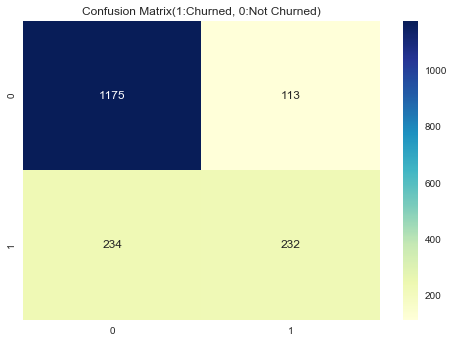

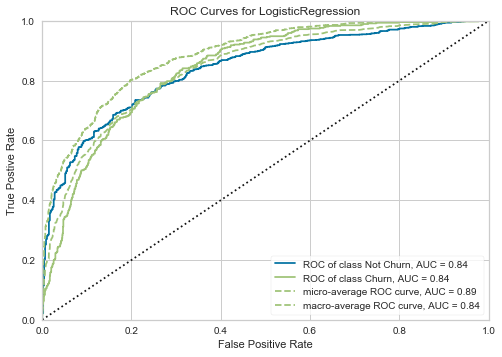

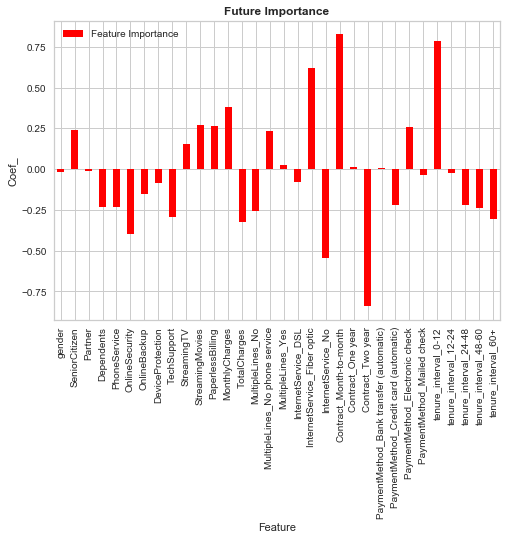

In [77]:
evaluate_model(LR,X_test,y_test,True) # evaluate model

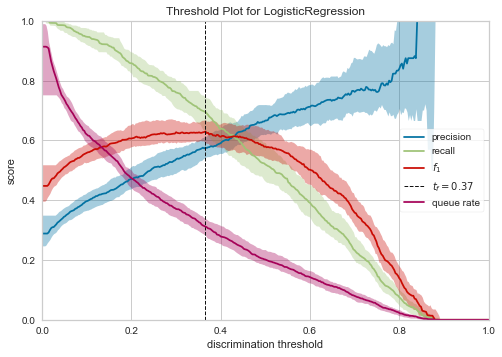

In [78]:
# let's look discimination  threshold

pred = LR.predict(X_test)
proba = LR.predict_proba(X_test) # discrimination threshold is 0.5, let's find best disc. threshold.
proba = pd.DataFrame(proba,columns=["0","1"])
proba["Selected Class"] = pred

# try to best threshold to maximize f1 score
vis = DiscriminationThreshold(LR)
vis.fit(X_train,y_train)
vis.poof()  # algorithm trys to maximize f1 score  
# threshold = 0.29

# 2) KNN

In [79]:
# LET'S FIND BEST K PARAMATER TO KNN

Text(0.5, 1.0, 'ROC/ACC scores for different k paramaters')

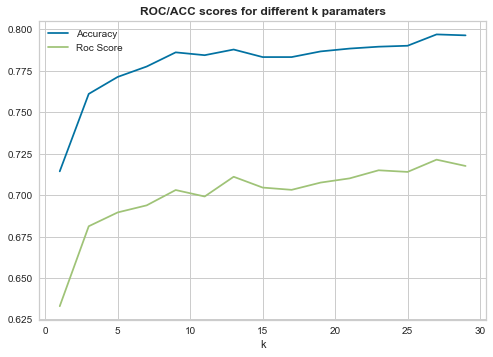

In [80]:
from sklearn.neighbors import KNeighborsClassifier


k_scores = {}
for k in range(1,30,2):
    
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)

    k_scores[k] = [KNN.score(X_test,y_test),roc_auc_score(y_test,KNN.predict(X_test))]
    
    
k_scores = pd.DataFrame(k_scores.items(),columns=["k","Accuracy"])

k_scores["Roc Score"] = k_scores["Accuracy"].apply(lambda x: x[1])

k_scores["Accuracy"] = k_scores["Accuracy"].apply(lambda x: x[0])

k_scores.set_index("k",inplace=True)

# plot graph
ax = k_scores.plot()
ax.set_title("ROC/ACC scores for different k paramaters",fontdict={"fontsize":12,"fontweight":"bold"})

In [81]:
# K = 9 looks good



Accuracy Score(Test): 0.7862029646522235
Accuracy Score(Train): 0.8187868416048678
Difference between train and test accuracy = 0.03258387695264431
Roc Auc Score: 0.7030929277850346


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1288
           1       0.61      0.53      0.57       466

    accuracy                           0.79      1754
   macro avg       0.73      0.70      0.71      1754
weighted avg       0.78      0.79      0.78      1754



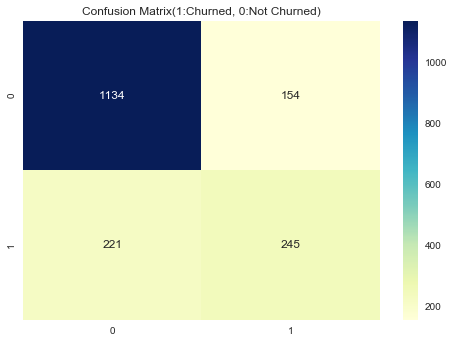

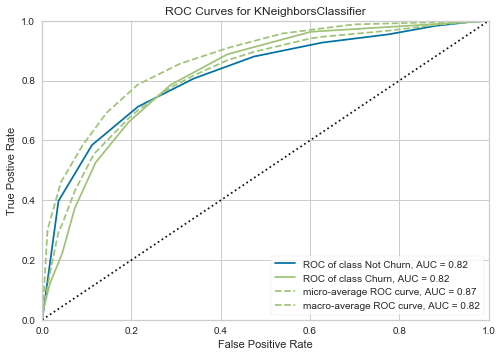

In [82]:
# use minkowski and p = 2  (euclidian distance) as ditance metric

KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
evaluate_model(KNN,X_test,y_test,False) # evaluate model

In [85]:
# LET'S LOOK KNN DECISIONS

proba = KNN.predict_proba(X_test)
proba = pd.DataFrame(proba,columns=["0","1"])
proba["Selected Class"] = pred
proba

,0,1,Selected Class
0,1.000000,0.000000,0
1,1.000000,0.000000,0
2,1.000000,0.000000,0
3,0.777778,0.222222,0
4,0.444444,0.555556,0
...,...,...,...
1749,0.888889,0.111111,0
1750,0.555556,0.444444,0
1751,0.666667,0.333333,1
1752,1.000000,0.000000,0


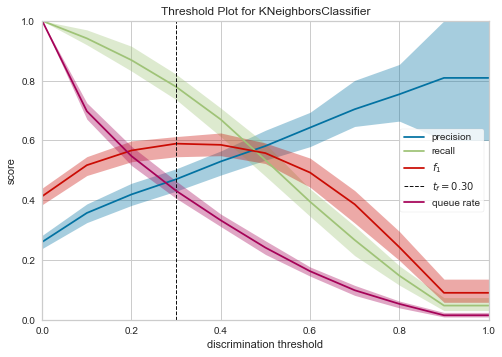

In [86]:
# try to best threshold to maximize f1 score
vis = DiscriminationThreshold(KNN)
vis.fit(X_train,y_train)
vis.poof()  # algorithm trys to maximize f1 score  
# threshold = 0.30

# 3) Gaussian Naive Bayes



Accuracy Score(Test): 0.7462941847206386
Accuracy Score(Train): 0.7467199087278951
Difference between train and test accuracy = 0.0004257240072564894
Roc Auc Score: 0.7560362407698664


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1288
           1       0.51      0.78      0.62       466

    accuracy                           0.75      1754
   macro avg       0.71      0.76      0.71      1754
weighted avg       0.80      0.75      0.76      1754



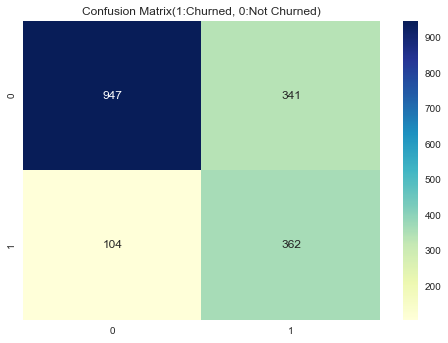

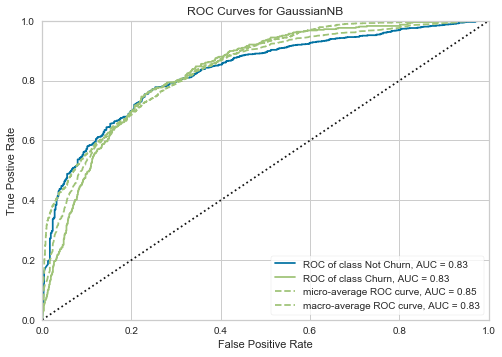

In [87]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,y_train)

evaluate_model(GNB,X_test,y_test,False)

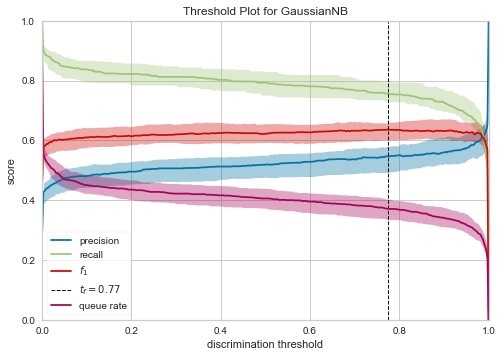

In [88]:
# Find best discrimination th.
vis = DiscriminationThreshold(GNB)
vis.fit(X_train,y_train)
vis.poof()  # algorithm trys to maximize f1 score  
# threshold = 0.89

# 4) Random Forest

In [89]:
# LET'S FIND BEST N_ESTIMATORS PARAMATER

Text(0.5, 1.0, 'ROC/ACC scores for different n_estimators paramaters')

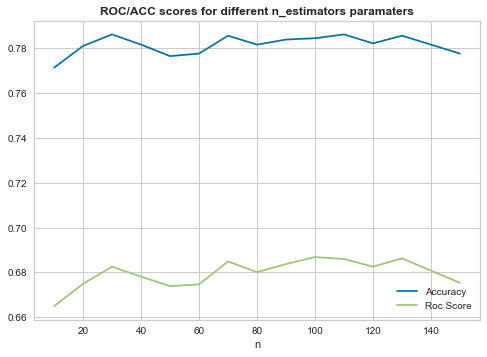

In [90]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = {}

for n in range(10,160,10):
    
    RF = RandomForestClassifier(n_estimators=n)
    RF.fit(X_train,y_train)

    n_estimators[n] = [RF.score(X_test,y_test),roc_auc_score(y_test,RF.predict(X_test))]


n_estimators = pd.DataFrame(n_estimators.items(),columns=["n","Accuracy"])

n_estimators["Roc Score"] = n_estimators["Accuracy"].apply(lambda x: x[1])

n_estimators["Accuracy"] = n_estimators["Accuracy"].apply(lambda x: x[0])

n_estimators.set_index("n",inplace=True)

ax = n_estimators.plot()
ax.set_title("ROC/ACC scores for different n_estimators paramaters",fontdict={"fontsize":12,"fontweight":"bold"})

In [91]:
# n_estimators = 60 looks good 

In [93]:

RF = RandomForestClassifier(n_estimators = 60,criterion="gini")

# WHEN WE TRAIN THIS MOPDEL AND EVALUATE IT, WE CAN CLEARLY SEE MODEL OVERFIT
#Accuracy Score(Test): 0.7765108323831242
# Accuracy Score(Train): 0.9975280471572542

In [94]:
# overfit, let's limit max depth



Accuracy Score(Test): 0.7890535917901939
Accuracy Score(Train): 0.8083285795778665
Difference between train and test accuracy = 0.01927498778767267
Roc Auc Score: 0.6639481646362594


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1288
           1       0.68      0.40      0.50       466

    accuracy                           0.79      1754
   macro avg       0.74      0.66      0.68      1754
weighted avg       0.77      0.79      0.77      1754



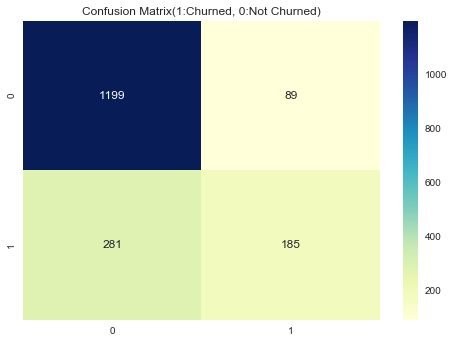

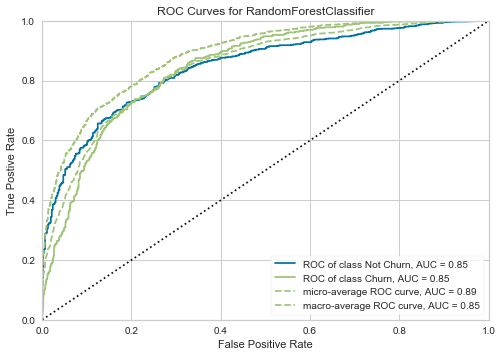

In [95]:
RF = RandomForestClassifier(n_estimators = 60,criterion="gini",max_depth=6)

RF.fit(X_train,y_train)

evaluate_model(RF,X_test,y_test,False) 

In [97]:
# LET'S LOOK FEATURE IMPORTANCES FOR RF MODEL

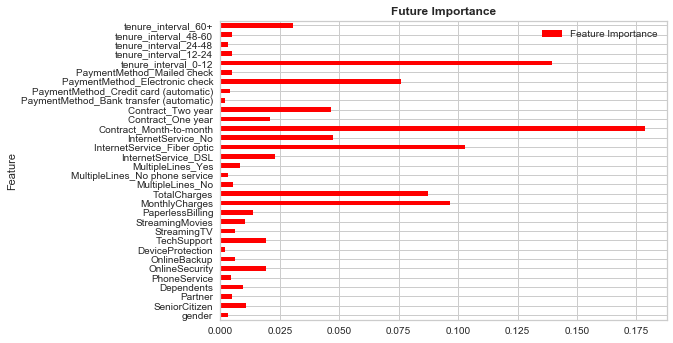

In [99]:
#Random Forest Feature Importance
feature_imp ={}

for idx,col_name in enumerate(X_train.columns):
    feature_imp[col_name] = RF.feature_importances_[idx]
    

feature_imp = pd.DataFrame(feature_imp.items(),columns = ["Feature","Feature Importance"])
feature_imp.set_index("Feature",inplace=True)


ax = feature_imp.plot(kind="barh",fontsize=10,color="red")

ax.set_title("Future Importance",fontdict={"fontsize":12,"fontweight":"bold"})

plt.show()

# 5) XGBOOST

Text(0.5, 1.0, 'ROC/ACC scores for different n_estimators paramaters')

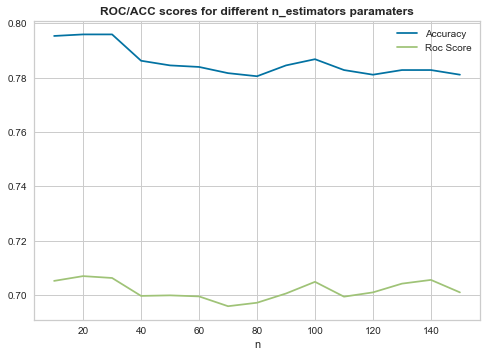

In [100]:
from xgboost import XGBClassifier

# let's find best n_est. paramater
n_estimators = {}

for n in range(10,160,10):
    
    XGB = XGBClassifier(n_estimators=n)
    XGB.fit(X_train,y_train)

    n_estimators[n] = [XGB.score(X_test,y_test),roc_auc_score(y_test,XGB.predict(X_test))]


n_estimators = pd.DataFrame(n_estimators.items(),columns=["n","Accuracy"])

n_estimators["Roc Score"] = n_estimators["Accuracy"].apply(lambda x: x[1])

n_estimators["Accuracy"] = n_estimators["Accuracy"].apply(lambda x: x[0])

n_estimators.set_index("n",inplace=True)

ax = n_estimators.plot()
ax.set_title("ROC/ACC scores for different n_estimators paramaters",fontdict={"fontsize":12,"fontweight":"bold"})


In [101]:
# n_estimators = 30 looks good



Accuracy Score(Test): 0.8038768529076397
Accuracy Score(Train): 0.8229701464156683
Difference between train and test accuracy = 0.019093293508028686
Roc Auc Score: 0.7123880388132114


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1288
           1       0.67      0.52      0.58       466

    accuracy                           0.80      1754
   macro avg       0.75      0.71      0.73      1754
weighted avg       0.79      0.80      0.80      1754



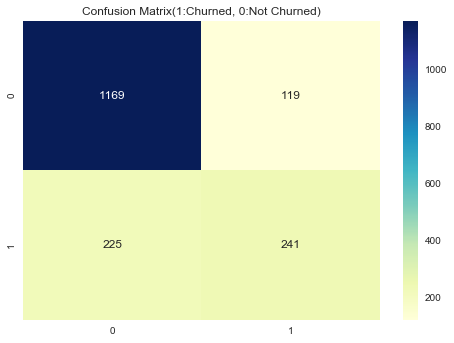

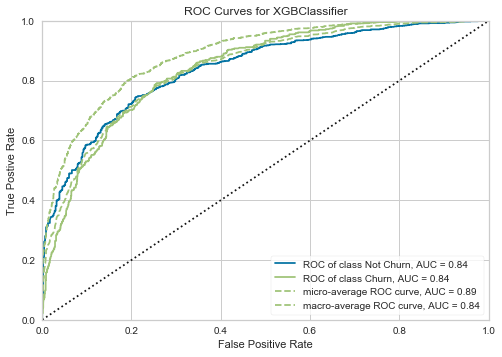

In [102]:
XGB = XGBClassifier(n_estimators=30,learning_rate = 0.1,random_state=42,max_depth=5)

XGB.fit(X_train,y_train)

evaluate_model(XGB,X_test,y_test,False)

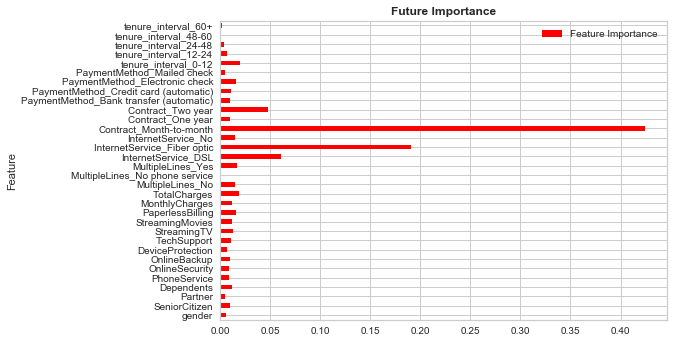

In [103]:
# Feature Importance for XGBoost

feature_imp ={}

for idx,col_name in enumerate(X_train.columns):
    feature_imp[col_name] = XGB.feature_importances_[idx]
    

feature_imp = pd.DataFrame(feature_imp.items(),columns = ["Feature","Feature Importance"])
feature_imp.set_index("Feature",inplace=True)


ax = feature_imp.plot(kind="barh",fontsize=10,color="red")

ax.set_title("Future Importance",fontdict={"fontsize":12,"fontweight":"bold"})

plt.show()

# 6) Artificial Neural Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5259 samples
Epoch 1/10
5259/5259 [==============================] - 1s 95us/sample - loss: 0.4982 - accuracy: 0.7667
Epoch 2/10
5259/5259 [==============================] - 0s 70us/sample - loss: 0.4189 - accuracy: 0.8028
Epoch 3/10
5259/5259 [==============================] - 0s 62u

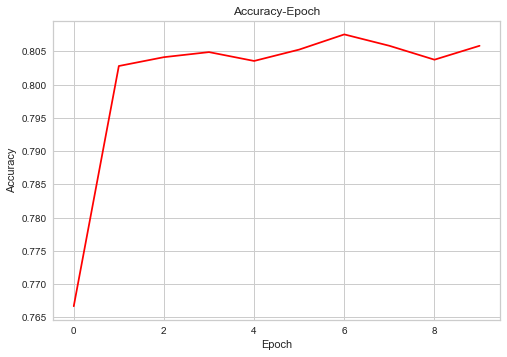

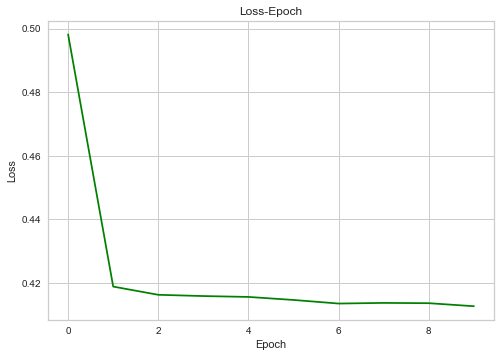

In [104]:
# NEURAL NETWORK

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU



model = Sequential()

model.add(Dense(16,kernel_initializer = "uniform",activation = LeakyReLU(),input_dim = 32))


model.add(Dense(16,kernel_initializer = "uniform",activation = LeakyReLU()))

model.add(Dense(1,kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])


model.summary()


history = model.fit(X_train,y_train,batch_size = 16,epochs=10)


plt.figure()
plt.plot(history.history["accuracy"],c="red")
plt.title("Accuracy-Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(history.history["loss"],c="green")
plt.title("Loss-Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [105]:
# 8 looks good, let's train ANN with 8 epoch

In [109]:
model = Sequential()

model.add(Dense(16,kernel_initializer = "uniform",activation = LeakyReLU(),input_dim = 32))


model.add(Dense(16,kernel_initializer = "uniform",activation = LeakyReLU()))

model.add(Dense(1,kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train,y_train,batch_size = 16,epochs=8)

Train on 5259 samples
Epoch 1/8
5259/5259 [==============================] - 0s 87us/sample - loss: 0.4940 - accuracy: 0.7716
Epoch 2/8
5259/5259 [==============================] - 0s 60us/sample - loss: 0.4191 - accuracy: 0.8002
Epoch 3/8
5259/5259 [==============================] - 0s 58us/sample - loss: 0.4175 - accuracy: 0.8030
Epoch 4/8
5259/5259 [==============================] - 0s 58us/sample - loss: 0.4161 - accuracy: 0.8062
Epoch 5/8
5259/5259 [==============================] - 0s 57us/sample - loss: 0.4148 - accuracy: 0.8059
Epoch 6/8
5259/5259 [==============================] - 0s 58us/sample - loss: 0.4150 - accuracy: 0.8043
Epoch 7/8
5259/5259 [==============================] - 0s 57us/sample - loss: 0.4135 - accuracy: 0.8083
Epoch 8/8
5259/5259 [==============================] - 0s 57us/sample - loss: 0.4133 - accuracy: 0.8066


Text(0, 0.5, 'Acc and f1-score')

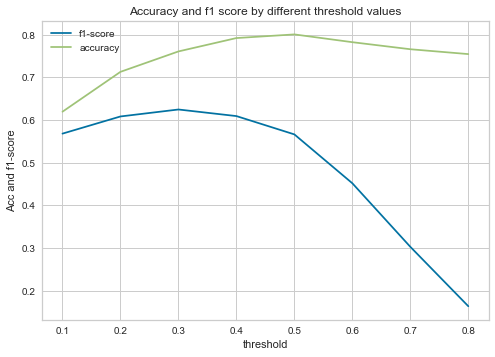

In [110]:
pred = pd.DataFrame(model.predict(X_test),index = X_test.index,columns=["Prediction"])

# LET'S FIND BEST THRESHOLD TO MAXIMIZE F1 SCORE

def find_ANN_f1_score(prediction,real,th):
    
    preds = []
    for i in prediction:
        if i>=th:
            preds.append(1)
        else:
            preds.append(0)
    
    return f1_score(real,preds),accuracy_score(real,preds)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

th_f1 = {}

for t in thresholds:
    th_f1[t] = find_ANN_f1_score(model.predict(X_test),y_test,t)


# let's plot result's
    
th_f1 = pd.DataFrame(th_f1.items(),columns=["threshold","f1-score"])

th_f1.set_index("threshold",inplace=True)

th_f1["accuracy"] = th_f1["f1-score"].apply(lambda x: x[1])

th_f1["f1-score"] = th_f1["f1-score"].apply(lambda x: x[0])

th_f1.plot()
plt.title("Accuracy and f1 score by different threshold values")
plt.ylabel("Acc and f1-score")

In [111]:
# 0.4 looks good for threshold



Accuracy Score(Test): 0.7924743443557583
Accuracy Score(Train): 0.7955885149267922
Difference between train and test accuracy = 0.003114170571033914
Roc Auc Score: 0.7340688561298749


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1288
           1       0.61      0.61      0.61       466

    accuracy                           0.79      1754
   macro avg       0.73      0.73      0.73      1754
weighted avg       0.79      0.79      0.79      1754



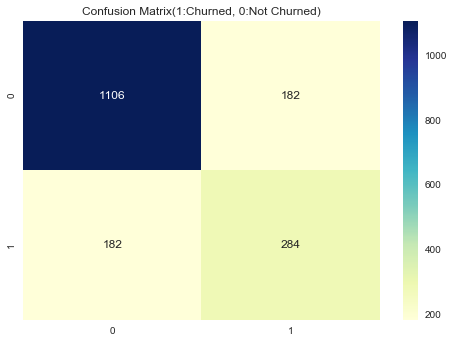

In [112]:
# EVALUATE MODEL

# test predictions
proba_test = model.predict(X_test)
predictions_test = []

for i in proba_test:
    if i >=0.4:
        predictions_test.append(1)
    else:
        predictions_test.append(0)
        
# train predictions
proba_train = model.predict(X_train)
predictions_train = []

for i in proba_train:
    if i >=0.4:
        predictions_train.append(1)
    else:
        predictions_train.append(0)
        
evaluate_ANN(predictions_test,y_test,predictions_train,y_train)

# COMPARING CLASSIFICATION MODELS 

In [113]:
results = pd.DataFrame(columns=["Model","Train Acc","Test Acc","f1-score","ROC-AUC score"])
    
results = results.append({"Model":"Logistic Regression","Train Acc":0.8060,"Test Acc":0.8021,"f1-score":0.5721,"ROC-AUC score":0.7050},ignore_index=True)
 
results = results.append({"Model":"KNN","Train Acc":0.8187,"Test Acc":0.7862,"f1-score":0.5664,"ROC-AUC score":0.7030},ignore_index=True)
  
results = results.append({"Model":"Gaussian NB","Train Acc":0.7467,"Test Acc":0.7462,"f1-score": 0.6193,"ROC-AUC score":0.7560},ignore_index=True)
 

results = results.append({"Model":"Random Forest","Train Acc":0.8083,"Test Acc":0.7913,"f1-score": 0.5106,"ROC-AUC score":0.6696},ignore_index=True)

results = results.append({"Model":"XGBoost","Train Acc":0.8229,"Test Acc":0.8038,"f1-score":  0.5835,"ROC-AUC score": 0.7123},ignore_index=True)


results = results.append({"Model":"ANN","Train Acc":0.7896,"Test Acc":0.7862,"f1-score":  0.6231,"ROC-AUC score": 0.7476},ignore_index=True) 


In [117]:
cm = sns.light_palette("green", as_cmap=True)
s = results.style.background_gradient(cmap=cm)

In [118]:
s

,Model,Train Acc,Test Acc,f1-score,ROC-AUC score
0,Logistic Regression,0.806000,0.802100,0.572100,0.705000
1,KNN,0.818700,0.786200,0.566400,0.703000
2,Gaussian NB,0.746700,0.746200,0.619300,0.756000
3,Random Forest,0.808300,0.791300,0.510600,0.669600
4,XGBoost,0.822900,0.803800,0.583500,0.712300
5,ANN,0.789600,0.786200,0.623100,0.747600


In [119]:
# dataset is inbalanced, so use f1 score rather than precision and recall. it will give better information

In [120]:
#RESULT: BEST MODEL İS ANN. BETTER TO FIND CHURNED CUSTOMERS